In [25]:
import os
import pandas as pd 
import numpy as np
from glob import glob
from typing import Dict, List

In [26]:
import json
from glob import glob

commands = [
    # ("matplotbench","zeroshot", "gpt-4o-mini"),
    # ("matplotbench","cot", "gpt-4o-mini"),
    # ("matplotbench","chat2vis", "gpt-4o-mini"),
    # ("matplotbench","matplotagent", "gpt-4o-mini"),
    ("matplotbench","vispath3", "gpt-4o-mini"),
    # ("matplotbench","vispathsimple", "gpt-4o-mini"),
    ("matplotbench","vispath2", "gpt-4o-mini"),
    ("matplotbench","vispath4", "gpt-4o-mini"),
    ("matplotbench","vispath5", "gpt-4o-mini"),
    ("matplotbench","vispath6", "gpt-4o-mini"),
    ("matplotbench","vispath7", "gpt-4o-mini"),
    ("matplotbench","vispath8", "gpt-4o-mini"),
]

# commands = [
#     ("matplotbench","vispathexecute1", "gpt-4o-mini"),
#     ("matplotbench","vispathexecute2", "gpt-4o-mini"),
#     ("matplotbench","vispathexecute3", "gpt-4o-mini"),
#     ("matplotbench","vispath1", "gpt-4o-mini"),
#     ("matplotbench","vispath2", "gpt-4o-mini"),
#     ("matplotbench","vispath3", "gpt-4o-mini"),
#     ("matplotbench","vispath4", "gpt-4o-mini"),
# ]

# commands = [
#     ("matplotbench","vispath_mini_1", "gpt-4o-mini"),
#     ("matplotbench","vispath_mini_2", "gpt-4o-mini"),
#     ("matplotbench","vispath_mini_3", "gpt-4o-mini"),
#     ("matplotbench","vispath_mini_4", "gpt-4o-mini"),
#     ("matplotbench","vispath_4o_1", "gpt-4o"),
#     ("matplotbench","vispath_4o_2", "gpt-4o"),
#     ("matplotbench","matplotagent", "gpt-4o")
# ]

# cur_path = os.path.abspath(os.curdir)
target = 'result'
result_path = f"{target}"

# Initialize a dictionary to store the results
results = {}

# Process each command for the JSON files
for com in commands:
    path = f"{result_path}/{com[1]}/{com[2]}/example_*/*.json"
    time_path = f"log/{com[1]}/{com[2]}/execution_time.txt"
    json_list = glob(path)

    # Initialize the sum of the scores
    total_executable_score = 0
    total_code_score = 0
    total_plot_score = 0
    count_valid_files = 0  # Counter for valid files where Executable Score is not 0

    # Sum up the scores from the JSON files
    for json_file in json_list:
        with open(json_file, 'r') as file:
            data = json.load(file)
            executable_score = int(data['Executable Score'])
            if executable_score != 0:
                total_executable_score += executable_score
                total_code_score += int(data['Code Score'])
                total_plot_score += int(data['Plot Score'])
                count_valid_files += 1
        try:
            with open(time_path, 'r') as f:
                execution_time = float(f.readline().strip())
        except:
            execution_time = 0

    # Calculate averages for valid files
    num_files = len(json_list)
    if num_files == 0 or count_valid_files == 0:  # If no valid files, skip
        continue
    else:
        avg_executable_score = total_executable_score / 100
        avg_code_score = total_code_score / count_valid_files  # Only valid files
        avg_plot_score = total_plot_score / count_valid_files  # Only valid files

        # Add the results to the dictionary
        case_name = f"{com[0]}_{com[1]}"
        results[case_name] = {
            "Total Data Experiment": num_files,
            "Average Executable Score": avg_executable_score * 100,
            "Average Code Score": avg_code_score,
            "Average Plot Score": avg_plot_score,
            "Execution Time" : execution_time
        }

# Save the results to a JSON file
output_path = f"baseline_{target}.json"

with open(output_path, 'w') as json_file:
    json.dump(results, json_file, indent=4)

print(f"Results have been saved to {output_path}")

Results have been saved to baseline_result.json


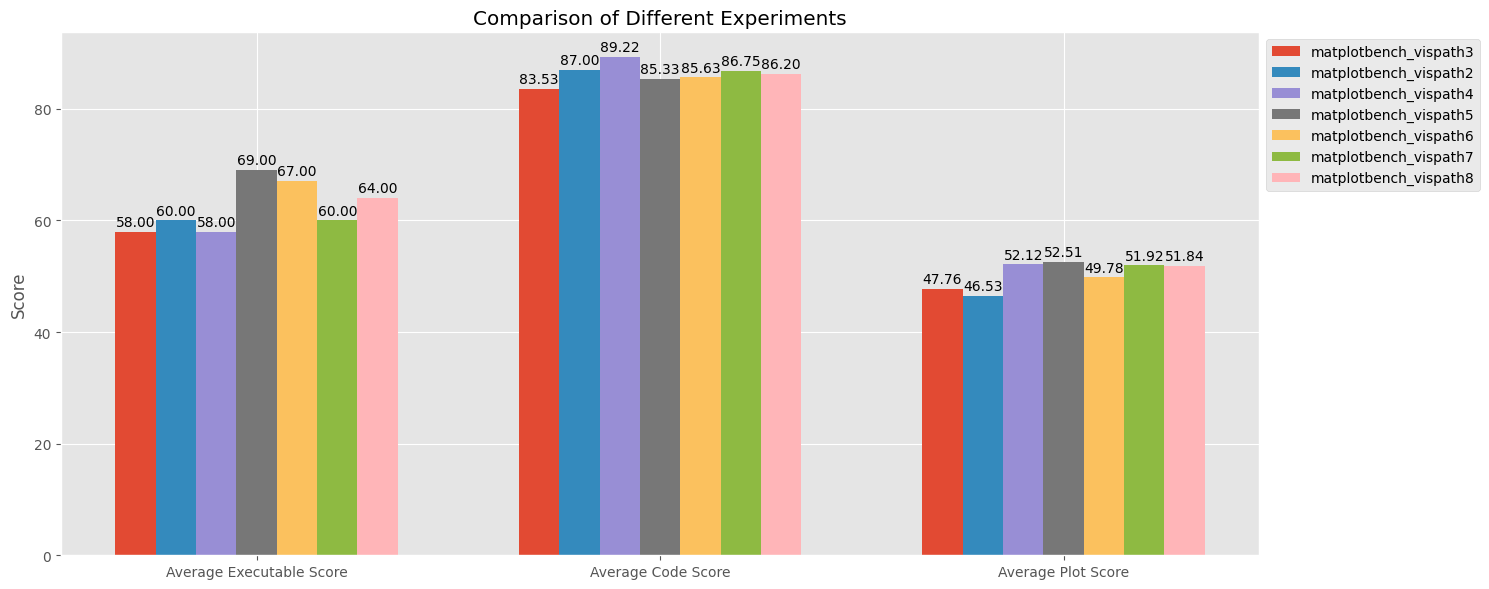

In [27]:
import matplotlib.pyplot as plt

df_result = pd.read_json(output_path)
df_plot = df_result.iloc[1:-1,0:].copy()
# Figure setup
fig, ax = plt.subplots(figsize=(15, 6))
plt.style.use('ggplot')

# Bar width and x positions with spacing between groups
bar_width = 0.15
spacing = 0.5  # Adjust spacing between different experiment groups
x = np.linspace(0, len(df_plot.index) * (0.5 + spacing), len(df_plot.index))

# Plot each score category as bars
for i, col in enumerate(df_plot.columns):
    bars = ax.bar(x + i * bar_width, df_plot[col], width=bar_width, label=col)
    
    # Adding labels on top of bars
    for bar in bars:
        yval = bar.get_height()  # Get the height (score) of the bar
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Add a small offset above the bar
                f'{yval:.2f}', ha='center', va='bottom', rotation = 0)  # Format the score to 2 decimal places

# Set x-axis
ax.set_xticks(x + bar_width * (len(df_plot.columns) / 2 - 0.5))
ax.set_xticklabels(df_plot.index, rotation=0, ha="center")

# Labels and title
ax.set_ylabel("Score")
ax.set_title("Comparison of Different Experiments")
ax.legend()

plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.tight_layout()
plt.show()